Goal: To practice real-world data handling and build a strong foundation in data exploration using Python.

Let’s begin by importing the **necessary Python libraries** for data analysis and visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We’re now loading the Zomato dataset using pandas. The dataset is encoded in latin-1, which helps prevent decoding errors that occur with special characters in the data.

We'll display the first few rows to get a quick look at the structure and content.

In [ ]:
df = pd.read_csv('zomato.csv', encoding = 'latin-1')
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


Let’s take a look at all the column names in the dataset. This helps us understand what features are available for analysis.



In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Missing Values
Before diving into analysis, it's important to identify any missing values in the dataset. Handling them properly ensures our insights are accurate and reliable.

We’ll first check how many null values exist in each column, and then decide how to handle them based on their relevance and quantity.

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [ ]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
#merging df_countrt and df
final_df = pd.merge(df,df_country,on='Country Code', how='left')
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [ ]:
#to check datatypes
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
#printing final_df columns
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
#final_df country value count
country_names = final_df['Country'].value_counts().index

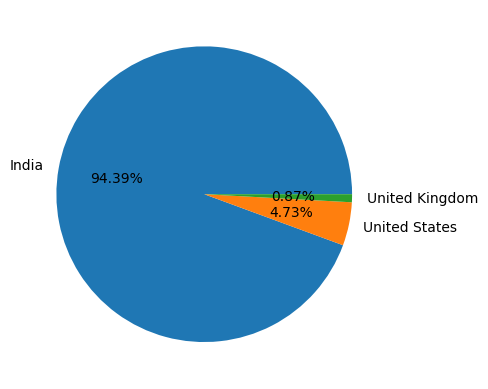

In [ ]:
#visualizing country_names in pie chart (only top 3 countries that uses zomato)
plt.pie(final_df['Country'].value_counts().values[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

In [ ]:
#grouping 'Aggregate Rating', 'Rating color', 'Rating text' by size
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

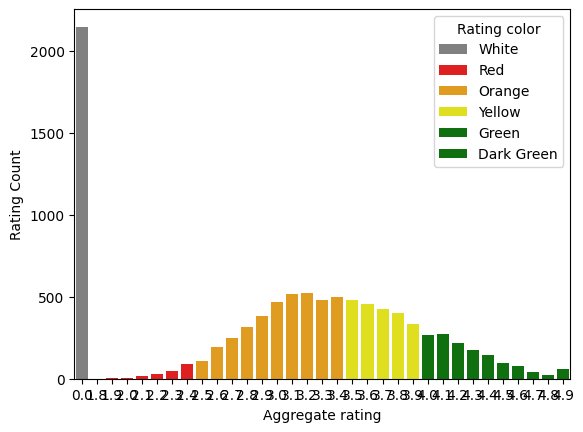

In [ ]:
#sns-barplot for Rating Count
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
sns.barplot(x='Aggregate rating',y='Rating Count',hue='Rating color', data=ratings, palette= ['gray', 'red', 'orange', 'yellow', 'green', 'green'])

<ipython-input-45-058192c6c9aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings, palette= ['gray', 'red', 'orange', 'yellow', 'green', 'green'])


<Axes: xlabel='Rating color', ylabel='count'>

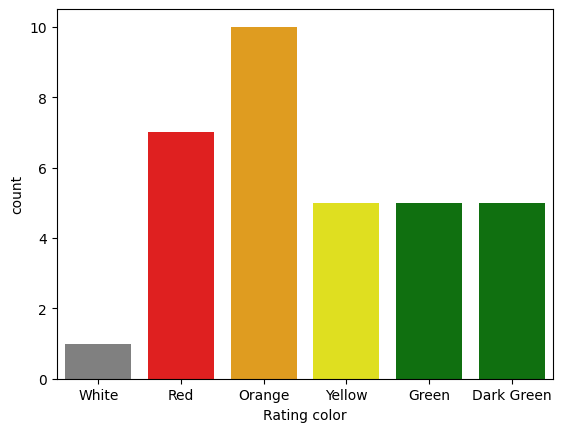

In [ ]:
#count plot
sns.countplot(x='Rating color', data=ratings, palette= ['gray', 'red', 'orange', 'yellow', 'green', 'green'])

In [ ]:
#find the countries names which has given 0 ratings
final_df[final_df['Rating color']=='White'].groupby(['Country','Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Country,Aggregate rating,Rating color,Rating text,Rating Count
0,Brazil,0.0,White,Not rated,5
1,India,0.0,White,Not rated,2139
2,United Kingdom,0.0,White,Not rated,1
3,United States,0.0,White,Not rated,3


In [ ]:
#find out which currency is used by which country
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [ ]:
#which countries have online deliveries option
final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,India,Yes,2423
1,UAE,Yes,28


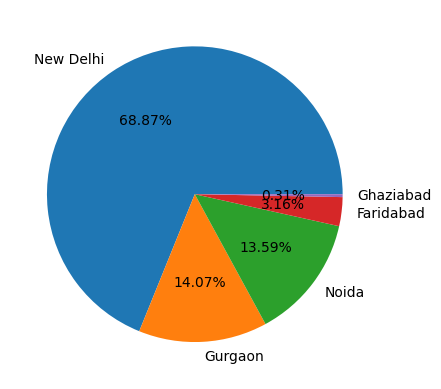

In [ ]:
#create a pie chart for cities distribution (top 5 only)
plt.pie(final_df['City'].value_counts().values[:5],labels=final_df['City'].value_counts().index[:5],autopct='%1.2f%%')
plt.show()

In [ ]:
#find the top 10 cuisines
final_df['Cuisines'].value_counts().index[:10]

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object', name='Cuisines')

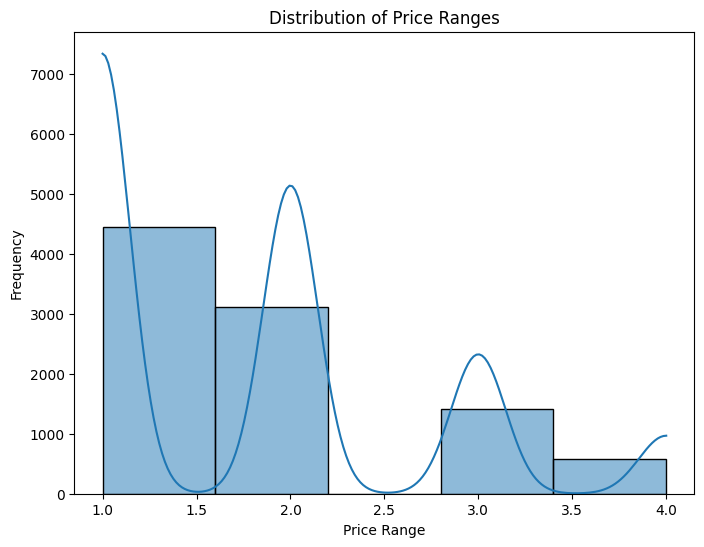

In [ ]:
# Create a histogram or bar plot to visualize the distribution of price ranges.
plt.figure(figsize=(8, 6))
sns.histplot(final_df['Price range'], bins=5, kde=True)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

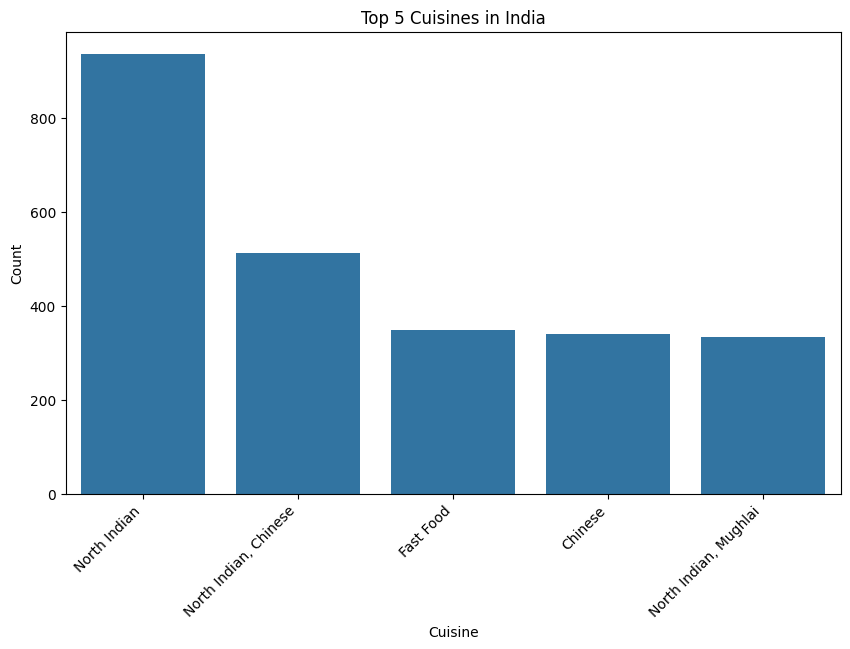

In [ ]:
# Group data by location and cuisine, then calculate the frequency of each cuisine.
cuisine_preferences = final_df.groupby(['Country', 'Cuisines'])['Cuisines'].count().reset_index(name='Count')
# Filter and visualize the top cuisines in specific countries or cities.
# (Example: Top 5 cuisines in India)
top_cuisines_india = cuisine_preferences[cuisine_preferences['Country'] == 'India'].sort_values(by='Count', ascending=False)[:5]
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisines', y='Count', data=top_cuisines_india)
plt.title('Top 5 Cuisines in India')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

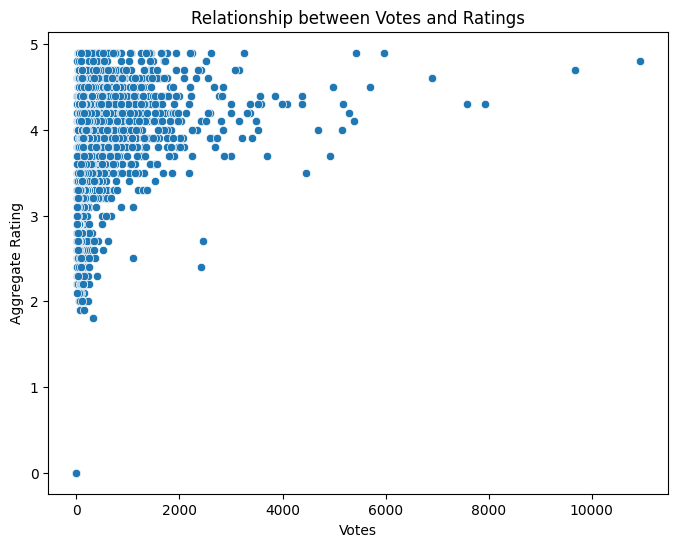

In [ ]:
# Create a scatter plot to visualize the relationship between votes and ratings.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=final_df)
plt.title('Relationship between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()